## **1. Import tensorflow libraries**
---

In [91]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential

## **2. Create the model illustrated in DualTw_model.pdf (to be completed)**
---

In [92]:
def createDualTwModel():

    #shared = Conv2D(32,(3,3),activation='relu',name='SharedLyr_32')

    Lin = Input(shape=(32,32,3),name='LeftIn')
    Lx = Conv2D(16, (3,3), padding='same',activation='relu')(Lin)
    Lx = Conv2D(16, (3,3), padding='same',activation='relu')(Lx)
    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
   

    Rin = Input(shape=(16,16,3),name='RightIn')
    Rx = Conv2D(16,(3,3),padding='same',activation='relu')(Rin)
    

    shared = Conv2D(32,(1,1),activation='relu',name='SharedLyr_32')  
    Lx = shared(Lx)
    Rx = shared(Rx) 

    # Join1
    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)

    shared = Conv2D(48,(1,1),activation='relu',name='SharedLyr_48')  
    Lx = shared(Lx)
    Rx = shared(Rx) 

    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
   

    shared = Conv2D(64,(1,1),activation='relu',name='SharedLyr_64')  
    Lx = shared(Lx)
    Rx = shared(Rx) 

    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)

    x = concatenate([Lx,Rx],axis=-1)
    x = Flatten()(x)
    x = Dense(128,activation='softmax')(x)
    x = Dense(3,activation='softmax')(x)
    #model = Model(inputs=[Lin,Rin], outputs=[Lx,Rx])
    model = Model(inputs=[Lin,Rin],outputs=x)
    model.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])
  
    return model


modelDualTw = createDualTwModel()
modelDualTw.summary()

Model: "functional_41"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
LeftIn (InputLayer)             [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_85 (Conv2D)              (None, 32, 32, 16)   448         LeftIn[0][0]                     
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 32, 32, 16)   2320        conv2d_85[0][0]                  
__________________________________________________________________________________________________
RightIn (InputLayer)            [(None, 16, 16, 3)]  0                                            
______________________________________________________________________________________

## **3. Plot the model**
---

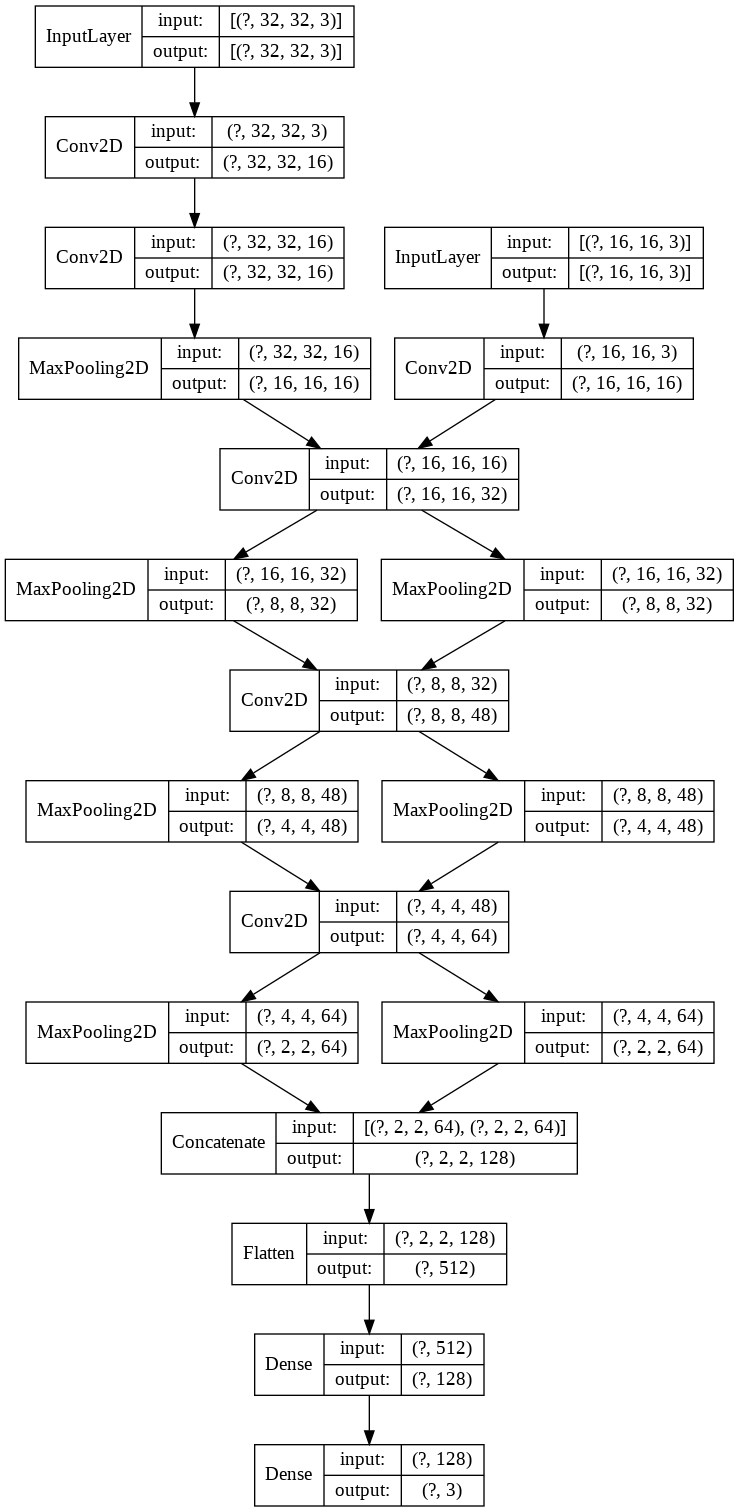

In [93]:
plot_model(modelDualTw, 
           to_file='DualTw_model.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')